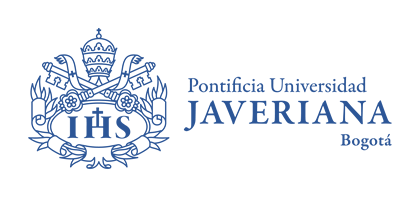

# Entrega # 1 Proyecto final - Redes neuronales para la clasificación de tumores de seno




Este notebook corresponde a la primera entrega que consiste en dar solución a el problema de clasificación de tumores de seno utilizando técnicas de aprendizaje profundo

Entregado por: 
   * Nikolas Rodriguez     
   * Angie Zapata 
   * Nicolas Mendez
   * Cristian Cristancho

## Importar librerias 

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import tensorflow.compat.v2 as tf
import seaborn as sns
from sklearn.model_selection import train_test_split 
import sklearn.datasets
from sklearn.datasets import make_blobs
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## Leer el dataset 
Descargado del repositorio https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29

In [19]:
df = pd.read_csv('Breast Cancer Prediction.csv')
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Análisis Exploratorio de los Datos 
Listado de variables indicando la cantidad de registros no nulos de cada uno y el tipo de variable

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


Verificar cantidad de nulos en cada variable

In [21]:
pd.DataFrame({'Missing Values': df.isna().sum()})

,Missing Values
Sample code number,0
Clump Thickness,0
Uniformity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,0
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0


Breve análisis descriptivo del dataset

In [22]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Observar distribuciones de las variables

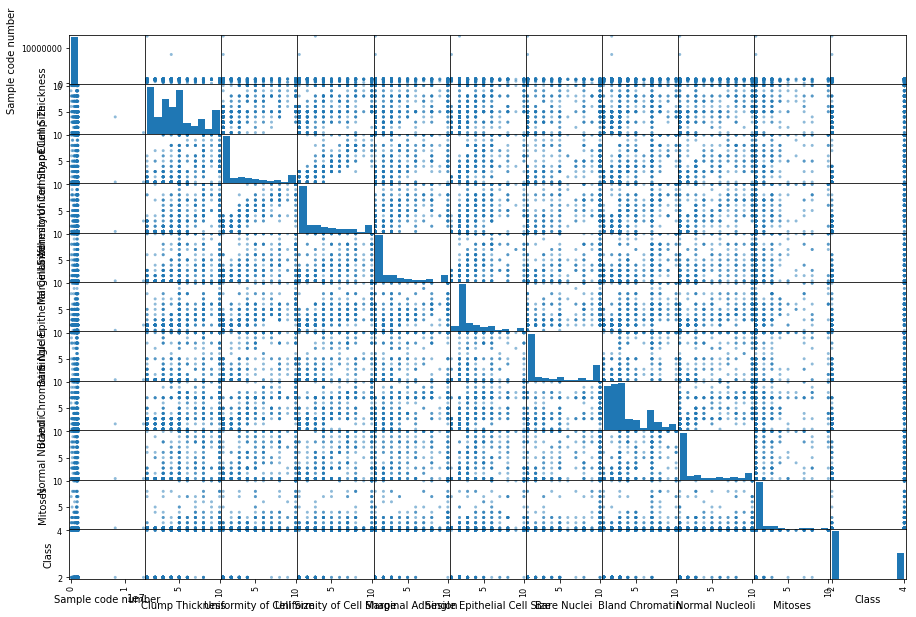

In [29]:
pd.plotting.scatter_matrix(df, figsize=(15,10));

## Observar Matriz de Correlaciones 

<AxesSubplot:>

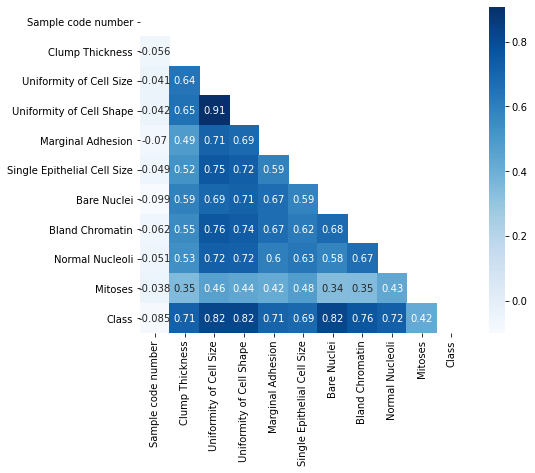

In [28]:
mask = np.zeros_like(df.corr())
tri_ind = np.triu_indices_from(mask)
mask[tri_ind] = True
plt.figure(figsize=[8, 6])
sns.heatmap(data=df.corr(), annot=True, mask=mask, cmap='Blues', square=True)

## Tratamiento de datos
Etapa de normalización para permitir un mejor funcionamiento de los algoritmos de optimización del error

Se utiliza la técnica de normalización: 

$
\frac{x-\bar{x}}{std(x)} 
$

In [30]:
def norm(x):
    return ( (x - x.mean()) / x.std() )

X = df.drop('Class', axis=1)
X = norm(X)
Y = df[['Class']]